In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
import xgboost as xgb
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario8_individual_model_approach"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2020-09-18 16:56:54.285548
[16:56:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-18 16:57:07.867352
AEW541’s final rmse value is = 1.096493
AEW541 R-squared value is = -0.121210
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2020-09-18 16:57:08.018465
[16:57:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-18 16:57:21.364114
Nilotinib’s final rmse value is = 1.007731
Nilotinib R-squared value is = -2.573121
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 16:57:21.546624
[16:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-18 16:57:37.072135
17-AAG’s final rmse value is = 1.396048


EndTime : 2020-09-18 17:02:46.516705
AZD6244’s final rmse value is = 1.141857
AZD6244 R-squared value is = 0.001796


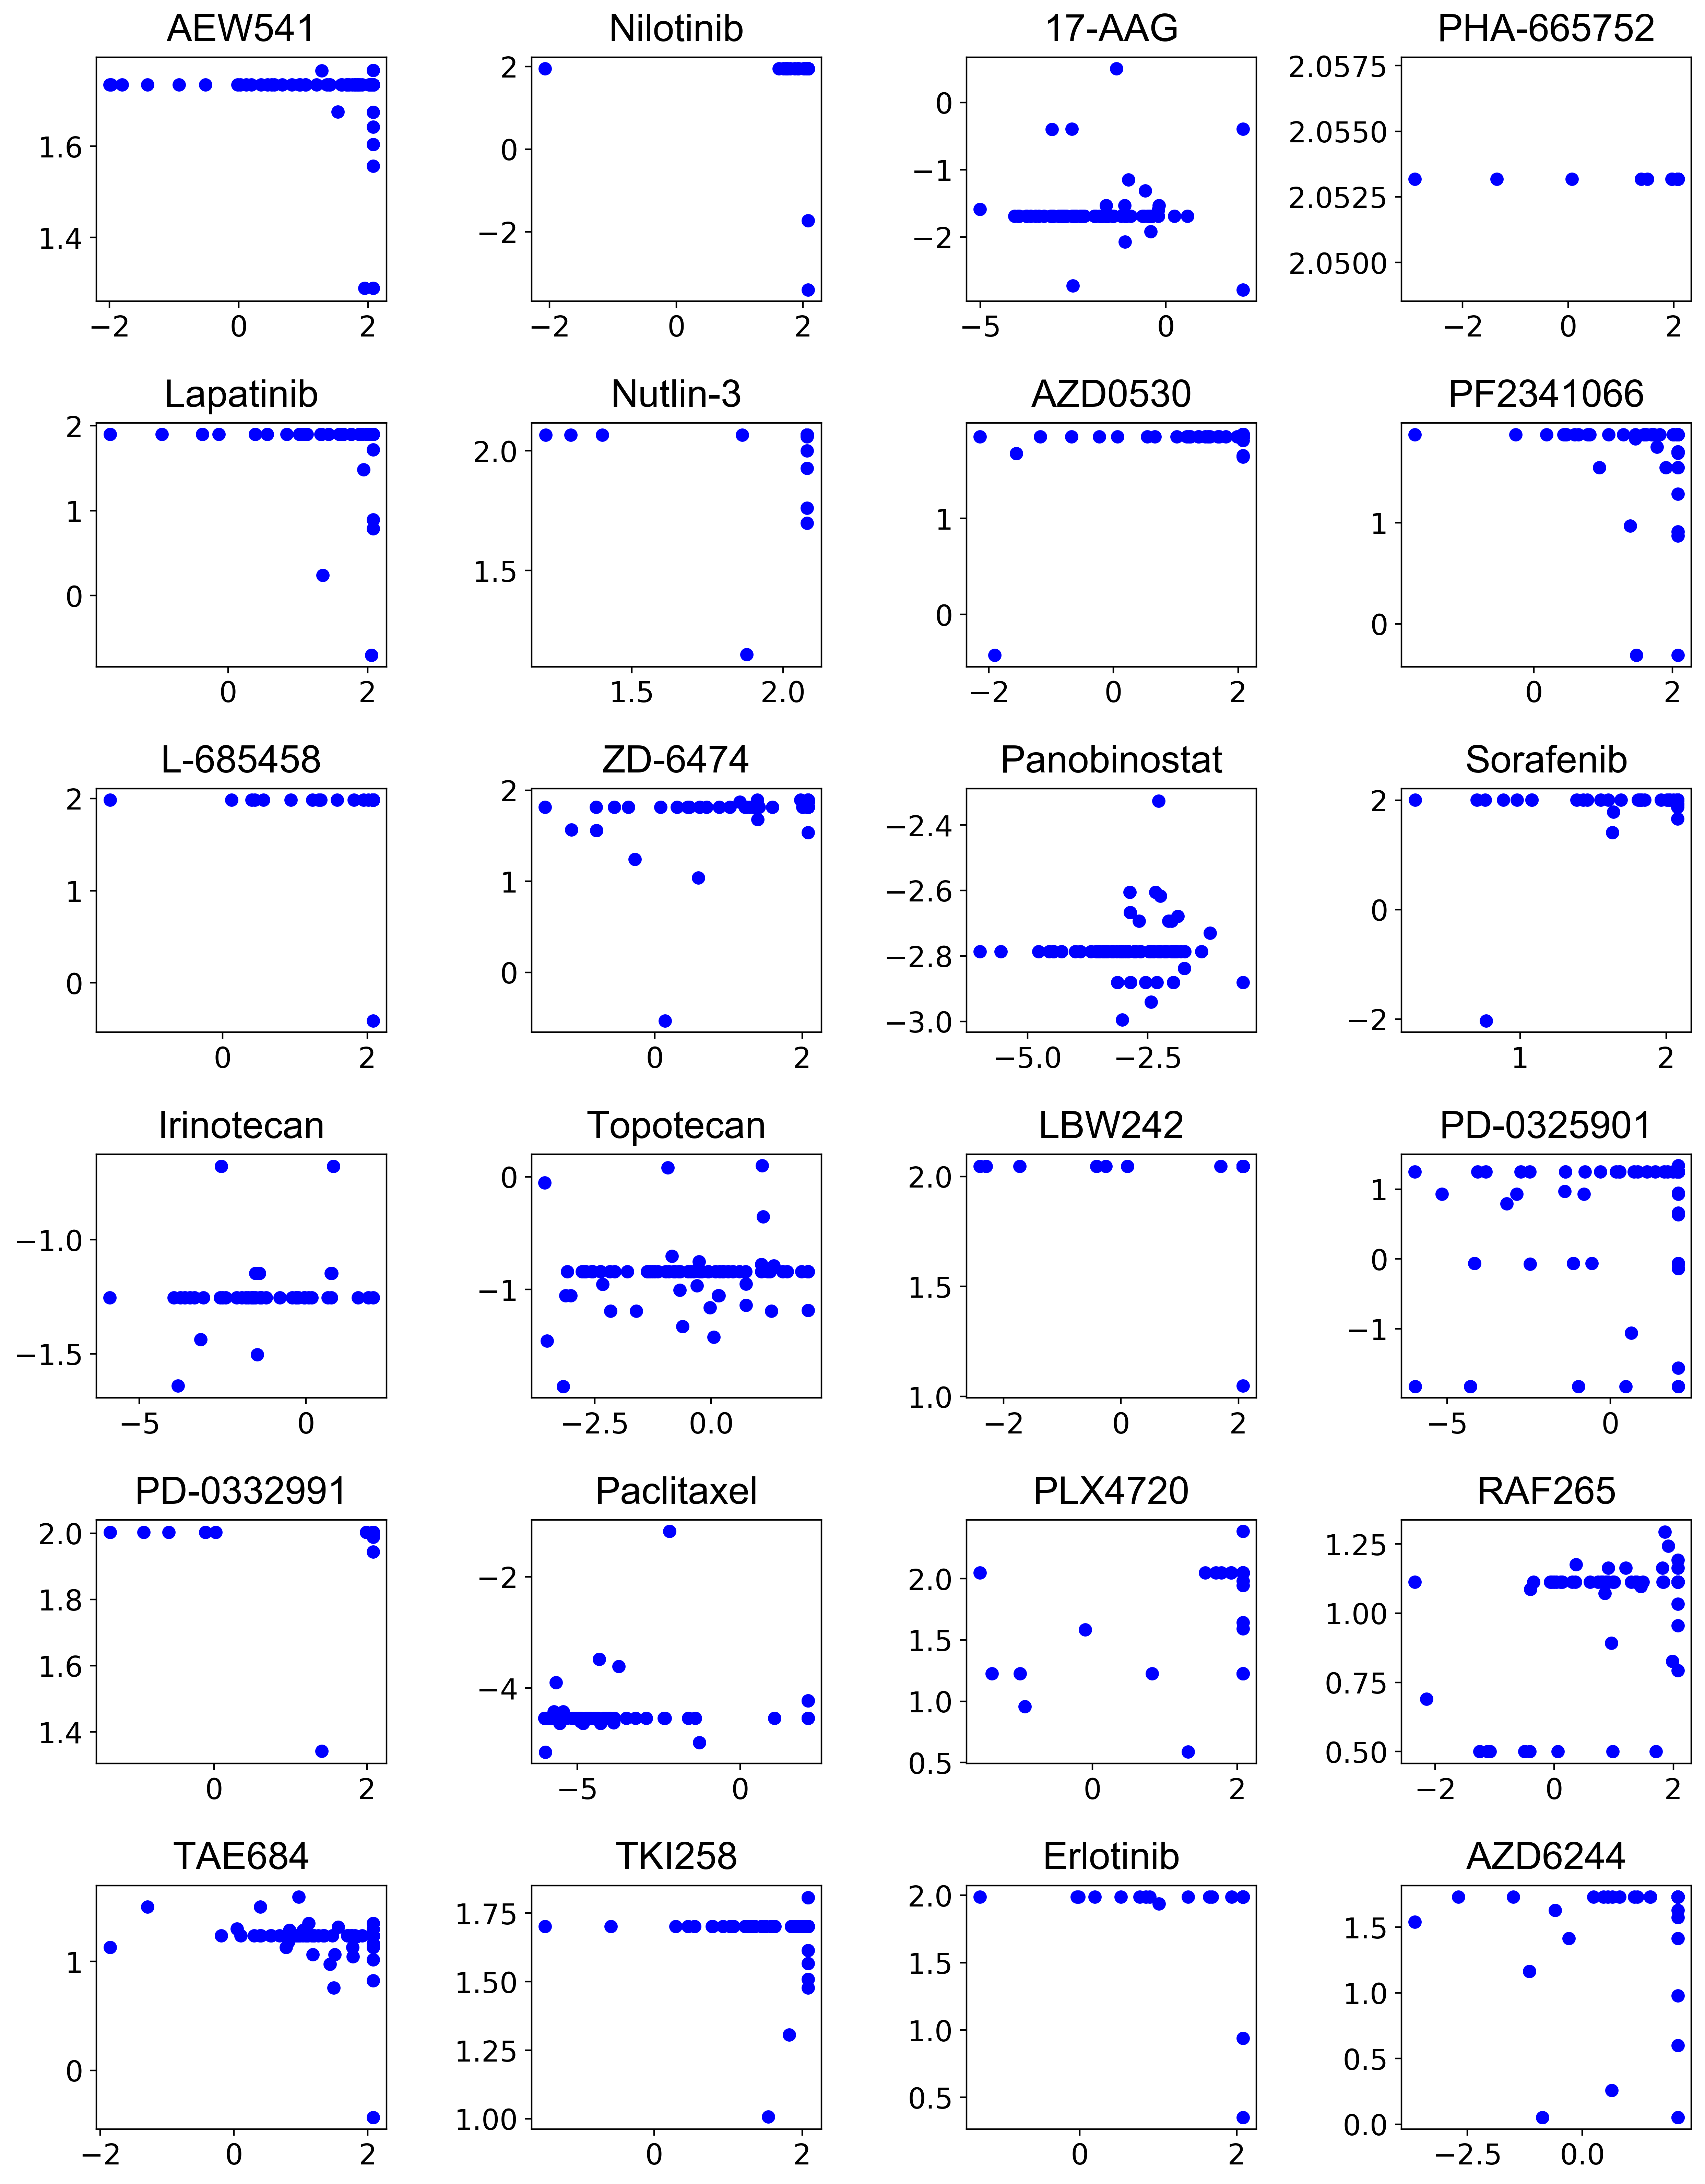

In [3]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_MC9K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    model = xgb.XGBRegressor()
    model.fit(train_X,train_y)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
        
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Table//XGB"
    c.to_csv(workdir + '//200915_scenario8_XGB_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//scenario8_individual_model_approach"
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Figure"    

plt.savefig(workdir +'//200915_scenario8_XGB_plot.png', dpi=400)

In [4]:
num

25

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,AEW541,1.096493,-0.121210
1,Nilotinib,1.007731,-2.573121
2,17-AAG,1.396048,-0.115290
3,PHA-665752,0.738798,-0.033444
4,Lapatinib,0.847716,-0.355886
5,Nutlin-3,0.186728,-0.452657
6,AZD0530,0.899124,0.134395
7,PF2341066,0.809704,-0.421071
8,L-685458,0.664920,-0.278782
9,ZD-6474,0.918623,0.015098


In [7]:
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario8_individual_approach" 
result.to_csv(workdir +'//200915_scenario8_XGB_24drugs_metrics.csv', index=False)